In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')

# Display top 10 rows of the dataset

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# Find number of rows and columns

In [5]:
data.shape

(48842, 15)

# Get a brief overview of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Fetch random samples from the dataset (50%)


In [7]:
data.sample(frac=0.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
43023,49,Local-gov,275074,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
40629,39,Private,99527,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
15986,49,Private,182541,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1485,40,United-States,>50K
21343,62,Private,178745,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
10195,43,Private,196344,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
21728,20,Private,89991,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,32,United-States,<=50K
13866,26,Private,57593,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18854,56,Private,117881,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


# Check null values in the dataset

In [8]:
data.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

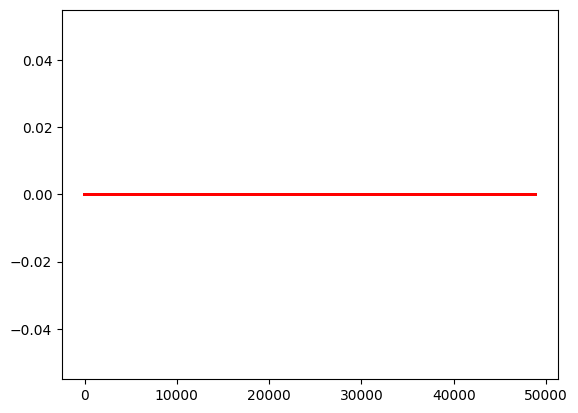

In [9]:
plt.plot(data.isnull(),color='red')

# Perform Data cleaning

Here in dataset workclass column has '?' as attribute replacing that with NaN

In [10]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
data.replace('?',np.NaN,inplace =True)

In [12]:
data.isin([np.NaN]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

# Drop all the missing values

In [14]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
data.dropna(how='any',inplace=True)

In [16]:
data.shape

(45222, 15)

In [17]:
48842-45222

3620

#  Check for duplicate data and drop them

In [18]:
# To check if there is any dupplicate data
data.duplicated().any()

True

In [19]:
#to calculate duplicate datas
data.duplicated().sum()

47

In [20]:
#dropping duplicate values in dataframe
data.drop_duplicates(inplace=True)

In [21]:
#after dropping duplicates rechecking dupplicate values in the dataframe
data.duplicated().sum()

0

In [22]:
#checking shape after dropping dulicates
data.shape

(45175, 15)

In [23]:
45222-45175

47

# Get overall statistics of the DataFrame

In [24]:
#only for columns containing numeric data
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
#for all columns
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Univariate analysis

# Analysis of age column

In [26]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

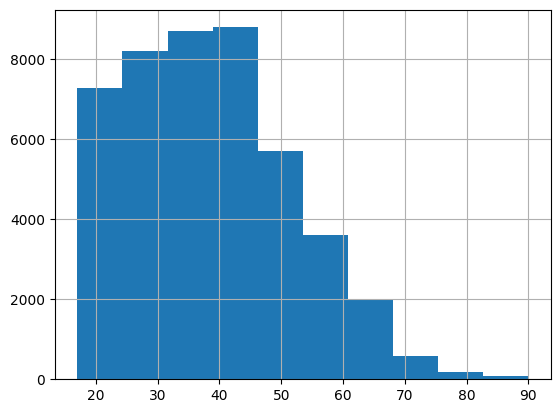

In [27]:
data.age.hist()

# Find total number of persons having age between 17 to 48 (inclusive) using between method

In [28]:
r=data[(data['age']>=17) & (data['age']<=48)]
r.value_counts()

age  workclass    fnlwgt  education     educational-num  marital-status      occupation       relationship   race                gender  capital-gain  capital-loss  hours-per-week  native-country  income
17   Federal-gov  29078   11th          7                Never-married       Adm-clerical     Own-child      Amer-Indian-Eskimo  Female  0             0             15              United-States   <=50K     1
38   Private      76317   Assoc-voc     11               Married-civ-spouse  Exec-managerial  Husband        White               Male    0             0             55              United-States   >50K      1
                  67666   Masters       14               Never-married       Exec-managerial  Not-in-family  Black               Female  0             0             38              United-States   <=50K     1
                  69306   Some-college  10               Divorced            Craft-repair     Unmarried      White               Female  0             0             40  

In [29]:
data.age.between(17,48).sum()

34858

# What is the distribution of workclass column?

In [30]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [31]:
data.workclass.describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<Axes: >

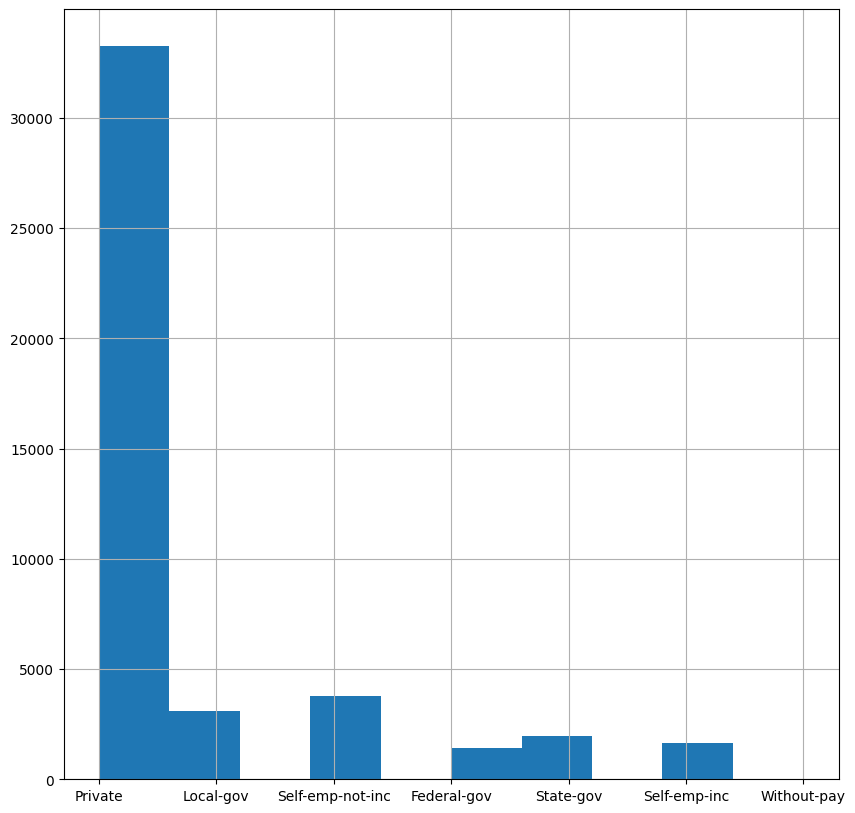

In [32]:
plt.figure(figsize=(10,10))
data.workclass.hist()

# How many persons having bachelors or masters degree?

In [33]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [34]:
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [35]:
len(data[data.education.isin(['Bachelors','Masters'])])

10072

# Bivariate Analysis

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

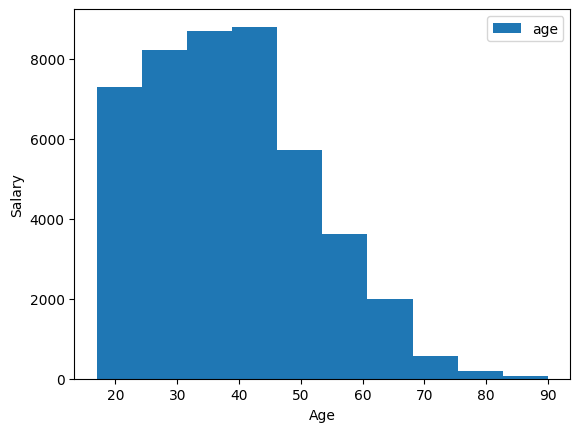

In [37]:
data.plot('income','age',kind='hist')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Replace salary values ['<=50k','>50k']With 0 and 1

In [38]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
data.income

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45175, dtype: object

In [40]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [41]:
data.income.value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

In [42]:
data.income.replace({'<=50K':0,'>50K':1},inplace=True)

In [43]:
data.income

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int64

In [44]:
data.income.unique()

array([0, 1])

<Axes: ylabel='Frequency'>

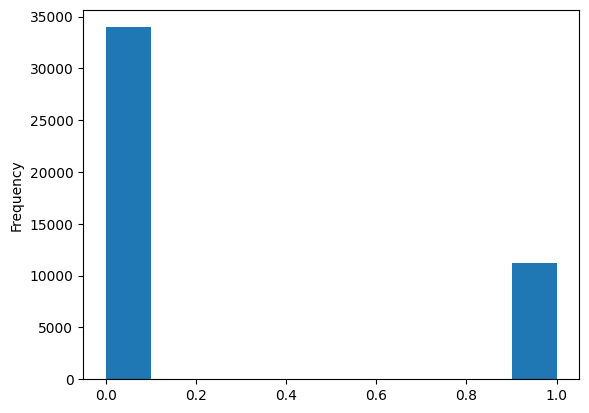

In [45]:
data.income.plot(kind='hist')

# Which workclass getting the highest salary?

In [46]:
data.groupby(by='workclass')['income'].mean().sort_values(ascending =False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

# Who has better chance to get salary >50k male or female?


In [47]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [48]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

# Convert workclass columns datatype to category datatype

In [49]:
data.groupby('workclass').size()

workclass
Federal-gov          1406
Local-gov            3100
Private             33262
Self-emp-inc         1645
Self-emp-not-inc     3795
State-gov            1946
Without-pay            21
dtype: int64

In [50]:
data.workclass=data.workclass.astype('category')

In [51]:
data.workclass.dtype

CategoricalDtype(categories=['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
                  'Self-emp-not-inc', 'State-gov', 'Without-pay'],
, ordered=False)